<a href="https://colab.research.google.com/github/Jyots9/fetal_health_prediction/blob/main/Fetal_Health_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [87]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score,f1_score,recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DATA

In [3]:
data_df = pd.read_csv("/content/drive/MyDrive/fetal_health.csv")
data_df.sample(10)

baseline value  accelerations  fetal_movement  uterine_contractions  \
873            136.0          0.003           0.000                 0.005   
1611           133.0          0.005           0.036                 0.004   
748            134.0          0.000           0.003                 0.000   
1731           134.0          0.008           0.001                 0.010   
405            150.0          0.000           0.000                 0.000   
1149           122.0          0.007           0.000                 0.000   
1146           122.0          0.000           0.000                 0.007   
770            134.0          0.000           0.000                 0.000   
681            140.0          0.003           0.003                 0.004   
469            151.0          0.000           0.002                 0.000   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
873                 0.000                   0.0                       0.0   
1611                0.001                   0.0                       0.0   
748                 0.000                   0.0                       0.0   
1731                0.006                   0.0                       0.0   
405                 0.005                   0.0                       0.0   
1149                0.002                   0.0                       0.0   
1146                0.008                   0.0                       0.0   
770                 0.000                   0.0                       0.0   
681                 0.000                   0.0                       0.0   
469                 0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
873                              44.0                                   0.7   
1611                             65.0                                   2.5   
748                              79.0                                   0.2   
1731                             61.0                                   1.1   
405                              70.0                                   1.4   
1149                             26.0                                   1.4   
1146                             21.0                                   1.7   
770                              80.0                                   0.2   
681                              34.0                                   2.9   
469                              81.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
873                                                18.0       ...   
1611                                                0.0       ...   
748                                                42.0       ...   
1731                                                0.0       ...   
405                                                48.0       ...   
1149                                                0.0       ...   
1146                                                0.0       ...   
770                                                90.0       ...   
681                                                 0.0       ...   
469                                                28.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
873           133.0          157.0                        1.0   
1611          127.0          161.0                        1.0   
748           128.0          145.0                        2.0   
1731           80.0          189.0                       10.0   
405            51.0          200.0                       10.0   
1149           85.0          146.0                        5.0   
1146           81.0          136.0                        2.0   
770           133.0          136.0                        1.0   
681            66.0          180.0                        9.0   
469           130.0          1

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
data_df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

## VISUALIZATION

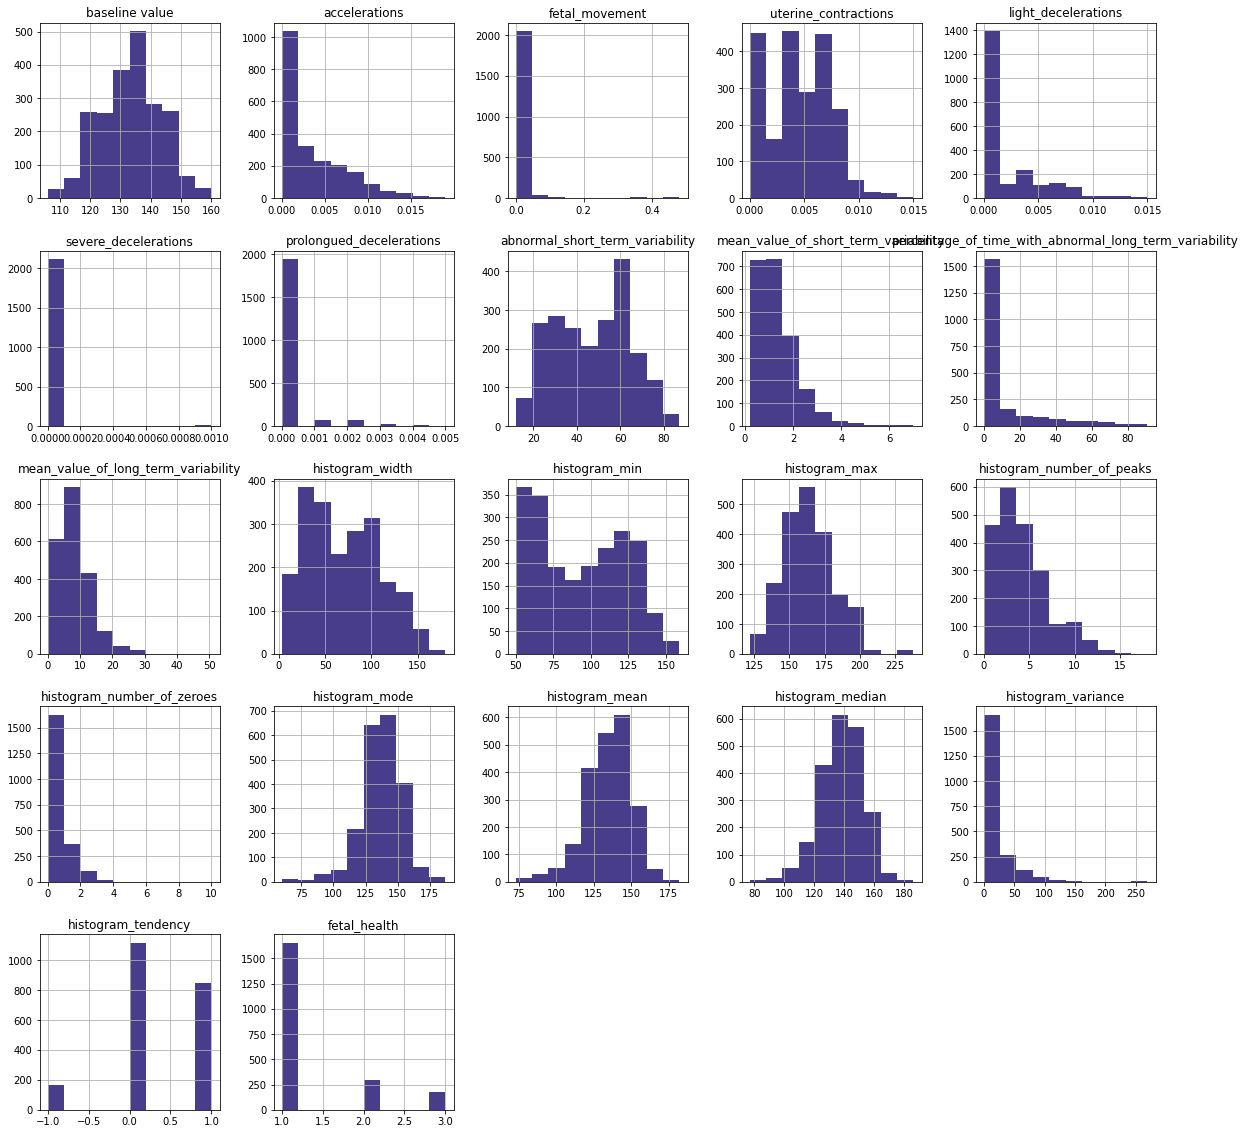

In [6]:
hist_plot = data_df.hist(figsize = (20,20), color = "#483D8B")

Evaluating skewness

In [7]:
from scipy import stats
for c in data_df.iloc[:,:-1]:
    skewness = stats.skew(data_df[c])
    if skewness < 0.5 and skewness > -0.5:
        print("The variable {} is SYMETRICAL ({})".format(c, skewness))
    elif (skewness >= 0.5 and skewness < 1) or (skewness > -1 and skewness <= -0.5):
        print("The variable {} is MODERATELY SKEWED ({})".format(c, skewness))
    else:
        print("The variable {} is HIGHLY SKEWED ({})".format(c, skewness))

The variable baseline value is SYMETRICAL (0.020297854871183345)
The variable accelerations is HIGHLY SKEWED (1.203542153070066)
The variable fetal_movement is HIGHLY SKEWED (7.805964765023443)
The variable uterine_contractions is SYMETRICAL (0.1592021195935797)
The variable light_decelerations is HIGHLY SKEWED (1.7172241762866713)
The variable severe_decelerations is HIGHLY SKEWED (17.341210717804756)
The variable prolongued_decelerations is HIGHLY SKEWED (4.320913737569469)
The variable abnormal_short_term_variability is SYMETRICAL (-0.01182022892360217)
The variable mean_value_of_short_term_variability is HIGHLY SKEWED (1.6561696383216045)
The variable percentage_of_time_with_abnormal_long_term_variability is HIGHLY SKEWED (2.19352626885173)
The variable mean_value_of_long_term_variability is HIGHLY SKEWED (1.3310579325954903)
The variable histogram_width is SYMETRICAL (0.3140130006787781)
The variable histogram_min is SYMETRICAL (0.11570231367169301)
The variable histogram_max is M

In [8]:
for c in data_df.iloc[:,:-1]:
    sqrt_col= np.sqrt(data_df[c])
    skewness = stats.skew(sqrt_col)
    if skewness < 0.5 and skewness > -0.5:
        print("The variable {} is SYMETRICAL ({})".format(c, skewness))
    elif (skewness >= 0.5 and skewness < 1) or (skewness > -1 and skewness <= -0.5):
        print("The variable {} is MODERATELY SKEWED ({})".format(c, skewness))
    else:
        print("The variable {} is HIGHLY SKEWED ({})".format(c, skewness))

The variable baseline value is SYMETRICAL (-0.07500659356797851)
The variable accelerations is SYMETRICAL (0.3220913077800501)
The variable fetal_movement is HIGHLY SKEWED (4.417338500339317)
The variable uterine_contractions is MODERATELY SKEWED (-0.8246029425451521)
The variable light_decelerations is MODERATELY SKEWED (0.8407495678300818)
The variable severe_decelerations is HIGHLY SKEWED (17.341210717804774)
The variable prolongued_decelerations is HIGHLY SKEWED (3.345307165695114)
The variable abnormal_short_term_variability is SYMETRICAL (-0.2929421742875925)
The variable mean_value_of_short_term_variability is MODERATELY SKEWED (0.5777248251839783)
The variable percentage_of_time_with_abnormal_long_term_variability is HIGHLY SKEWED (1.2397486142415586)
The variable mean_value_of_long_term_variability is SYMETRICAL (-0.46563551502207007)
The variable histogram_width is SYMETRICAL (-0.1454864993286414)
The variable histogram_min is SYMETRICAL (-0.04889291624334705)
The variable hi

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
for c in data_df.iloc[:,:-1]:
    bc_col= stats.yeojohnson(data_df[c])[0]
    skewness = stats.skew(bc_col)
    if skewness < 0.5 and skewness > -0.5:
        print("The variable {} is SYMETRICAL ({})".format(c, skewness))
    elif (skewness >= 0.5 and skewness < 1) or (skewness > -1 and skewness <= -0.5):
        print("The variable {} is MODERATELY SKEWED ({})".format(c, skewness))
    else:
        print("The variable {} is HIGHLY SKEWED ({})".format(c, skewness))


The variable baseline value is SYMETRICAL (-0.006121028734165407)
The variable accelerations is SYMETRICAL (0.38074289723007126)
The variable fetal_movement is HIGHLY SKEWED (1.8404132730261982)
The variable uterine_contractions is SYMETRICAL (0.01809995589001252)
The variable light_decelerations is MODERATELY SKEWED (0.6924017083816947)
The variable severe_decelerations is HIGHLY SKEWED (17.341210717804774)
The variable prolongued_decelerations is HIGHLY SKEWED (3.005865182493586)
The variable abnormal_short_term_variability is SYMETRICAL (-0.119450451745354)
The variable mean_value_of_short_term_variability is SYMETRICAL (0.03152452774878168)
The variable percentage_of_time_with_abnormal_long_term_variability is MODERATELY SKEWED (0.5253064668993255)
The variable mean_value_of_long_term_variability is SYMETRICAL (0.002290295648372058)
The variable histogram_width is SYMETRICAL (-0.11747633847535133)
The variable histogram_min is SYMETRICAL (-0.06509832977953876)
The variable histogra

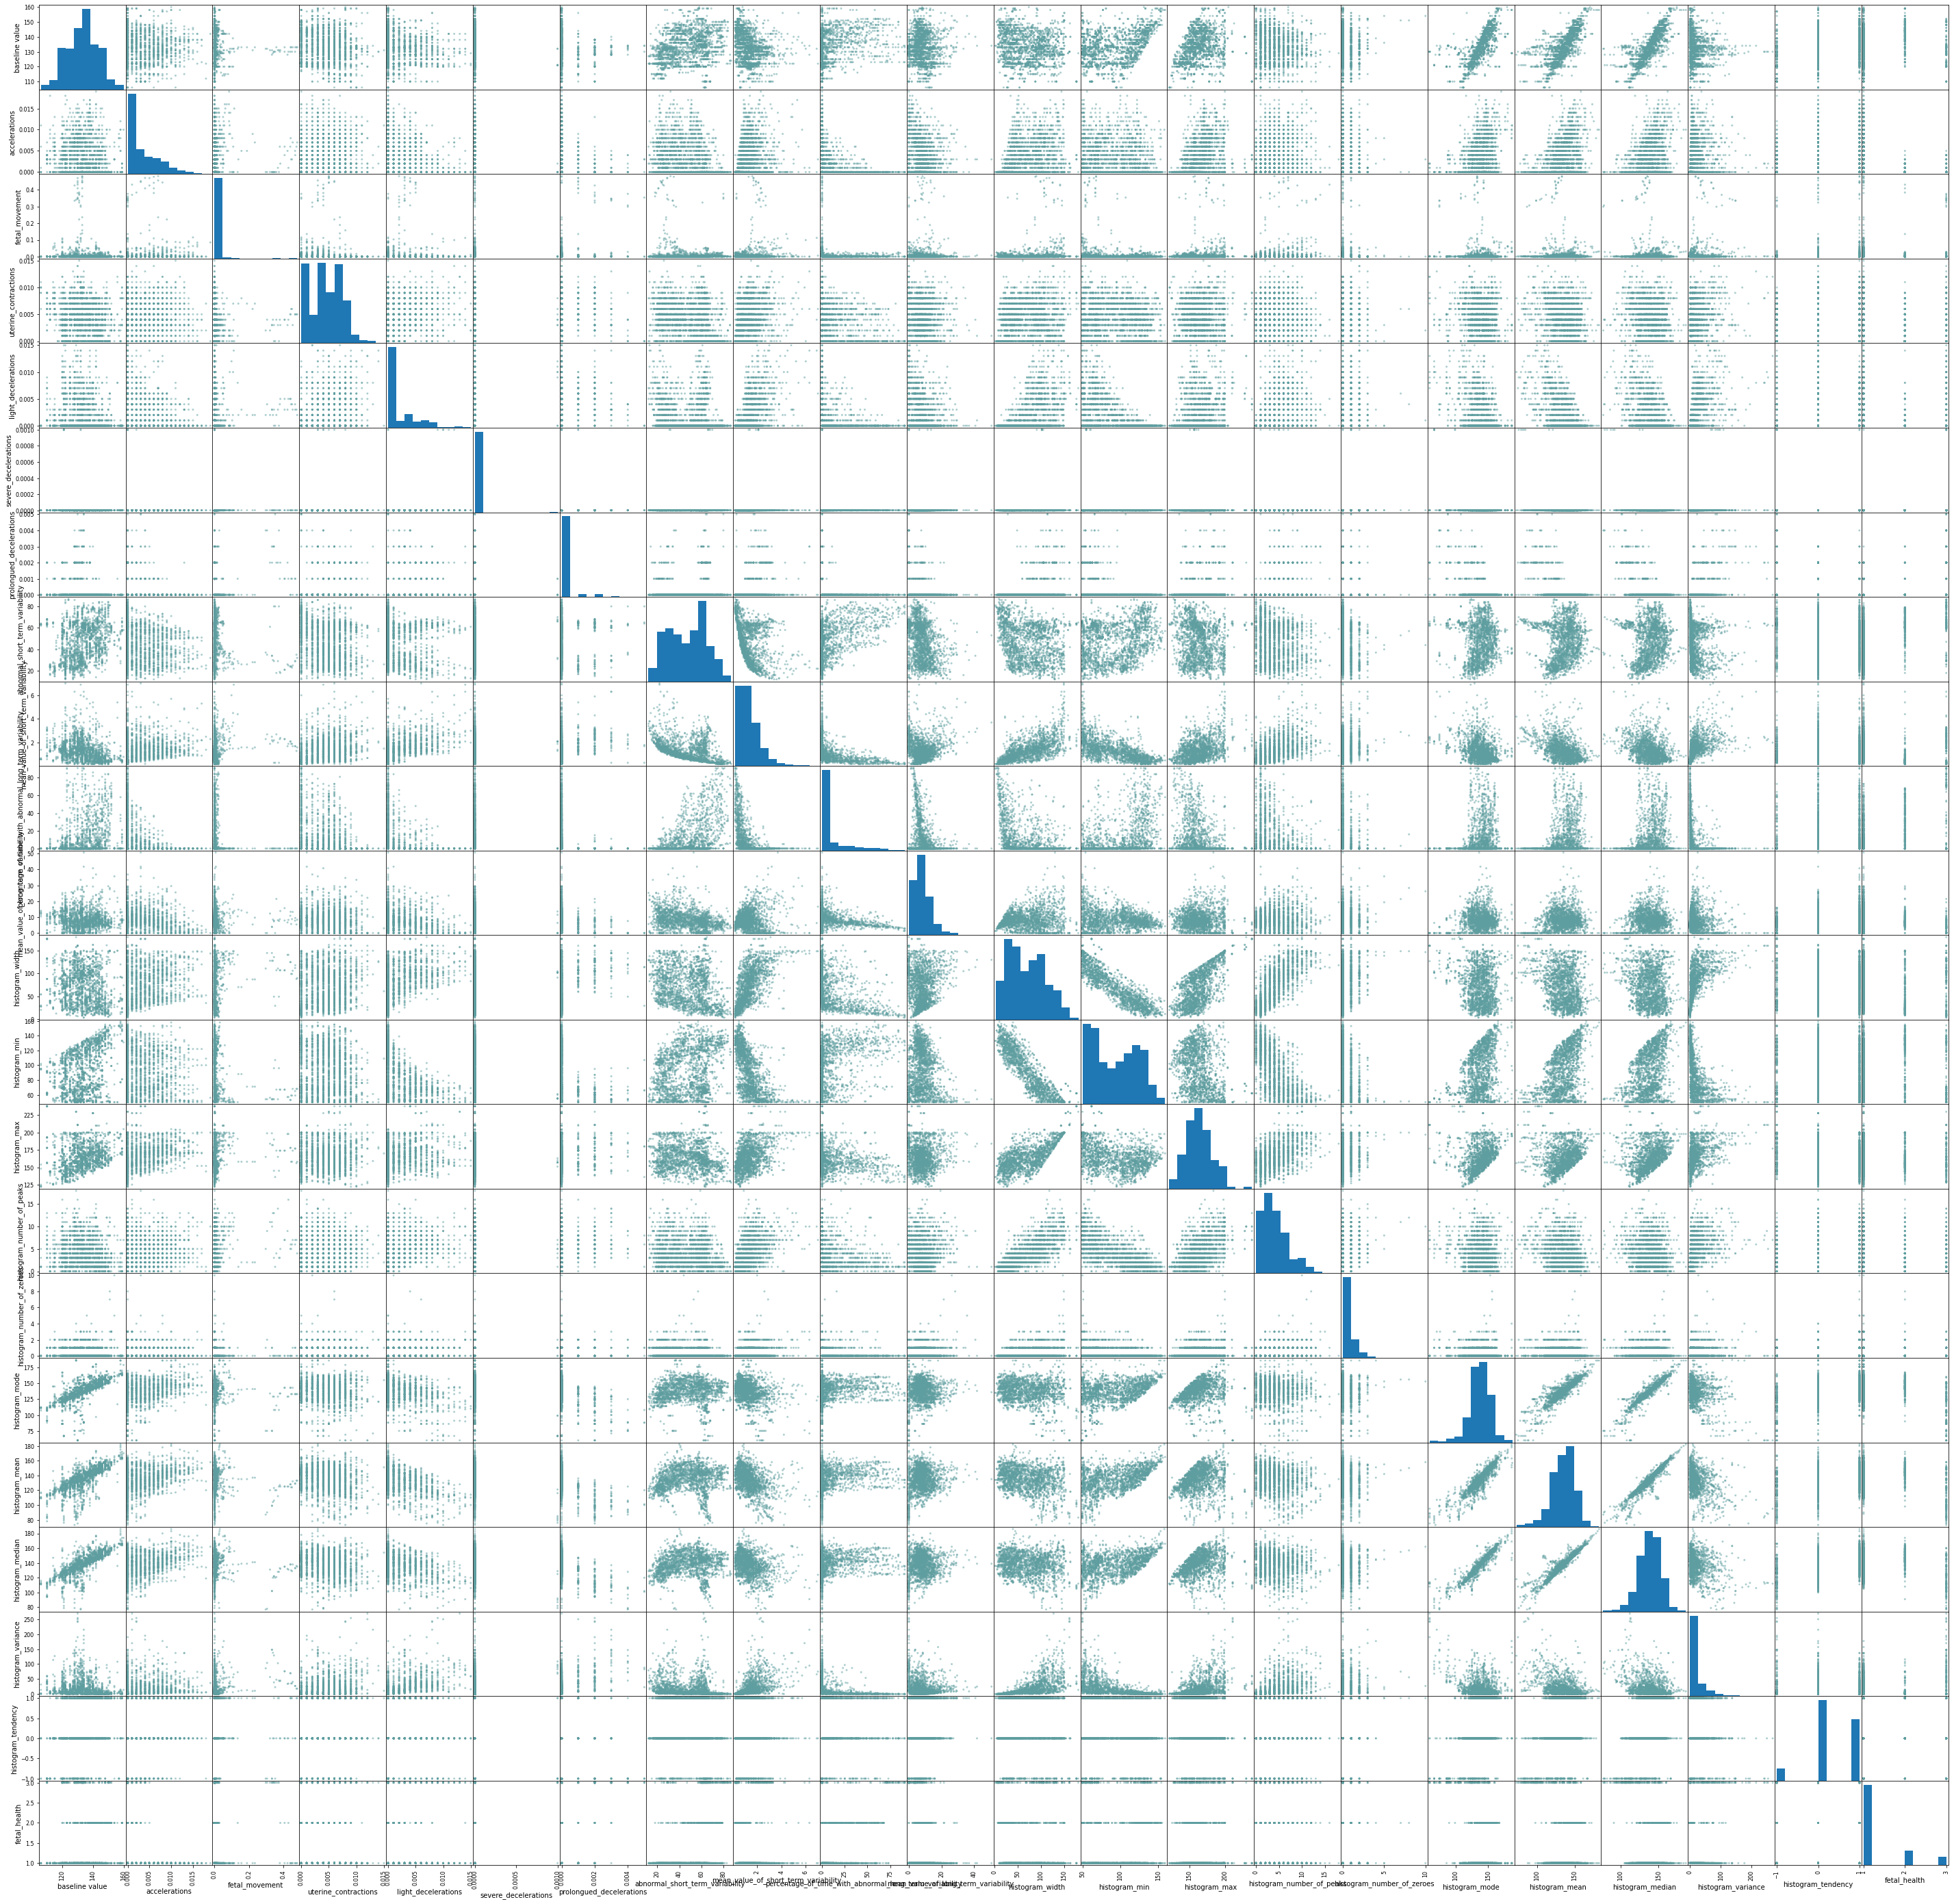

In [10]:
from pandas.plotting import scatter_matrix
scatterMatrix = scatter_matrix(data_df,figsize=(50, 50), color = "#5F9EA0")

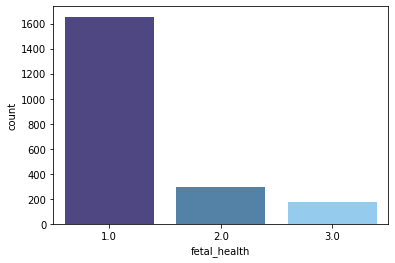

In [11]:
colors=["#483D8B","#4682B4", "#87CEFA"]
ax = sns.countplot(data= data_df, x="fetal_health", palette=colors)
plt.show()

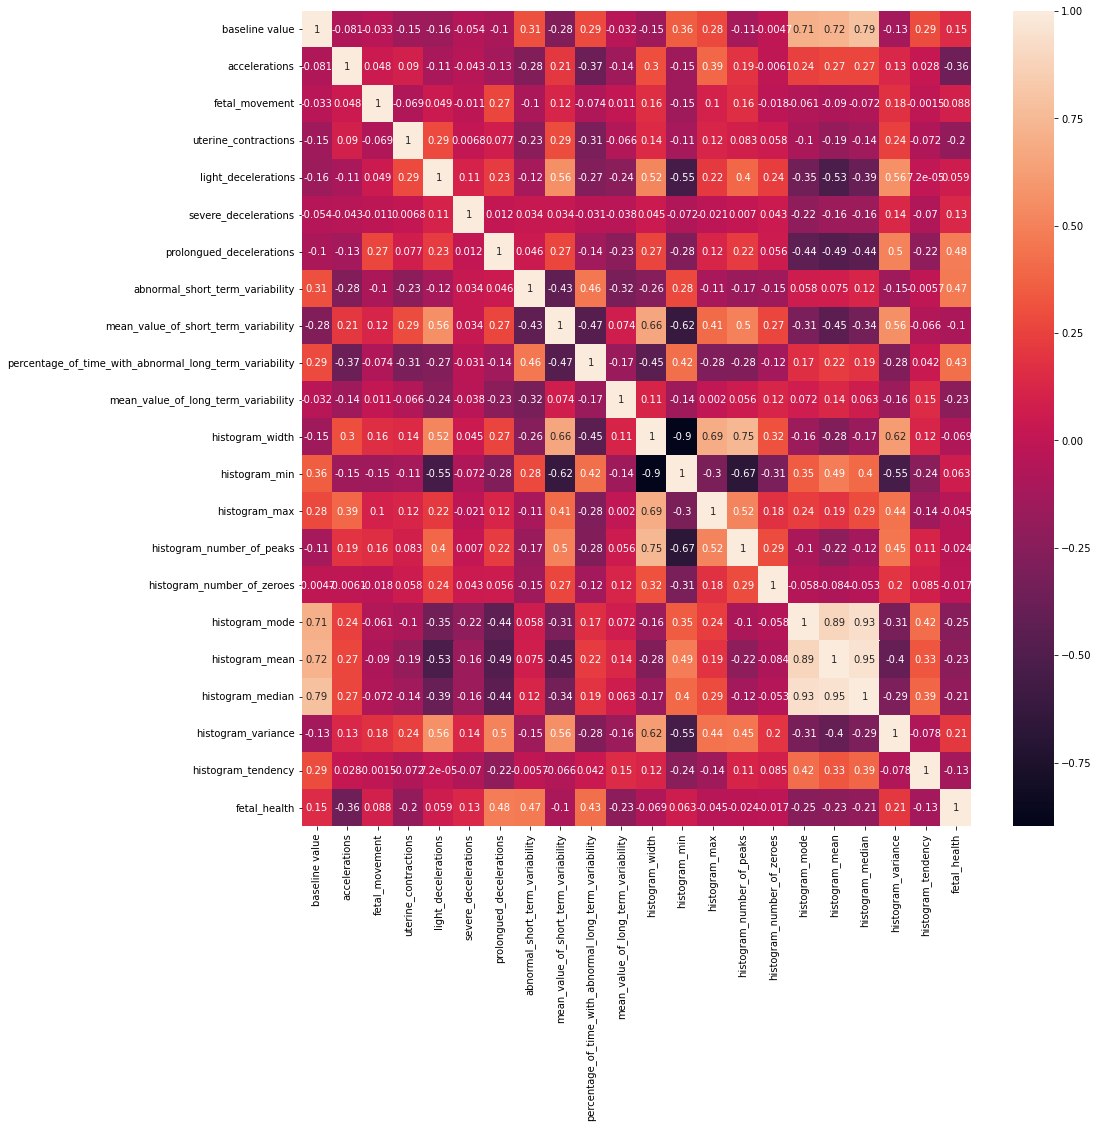

In [12]:
corrmat= data_df.corr()

f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat,annot=True)
plt.show()

In [14]:
X=data_df.drop(["fetal_health"],axis=1)
y=data_df["fetal_health"]

col_names = list(X.columns)
s_scaler = StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count    2.126000e+03   2.126000e+03    2.126000e+03          2.126000e+03   
mean     1.069490e-15  -4.010589e-17   -1.336863e-17         -1.336863e-16   
std      1.000235e+00   1.000235e+00    1.000235e+00          1.000235e+00   
min     -2.775197e+00  -8.223883e-01   -2.032096e-01         -1.482465e+00   
25%     -7.423728e-01  -8.223883e-01   -2.032096e-01         -8.034341e-01   
50%     -3.088439e-02  -3.048813e-01   -2.032096e-01         -1.244037e-01   
75%      6.806040e-01   7.301328e-01   -1.389076e-01          8.941419e-01   
max      2.713428e+00   4.093929e+00    1.010654e+01          3.610264e+00   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count         2.126000e+03          2.126000e+03              2.126000e+03   
mean         -5.347452e-17          6.684315e-18              1.336863e-17   
std           1.000235e+00          1.000235e+00              1.000235e+00   
min          -6.384375e-01         -5.747560e-02             -2.687543e-01   
25%          -6.384375e-01         -5.747560e-02             -2.687543e-01   
50%          -6.384375e-01         -5.747560e-02             -2.687543e-01   
75%           3.752430e-01         -5.747560e-02             -2.687543e-01   
max           4.429965e+00          1.739869e+01              8.208570e+00   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                     2.126000e+03                          2.126000e+03   
mean                     -7.352747e-17                          6.684315e-17   
std                       1.000235e+00                          1.000235e+00   
min                      -2.035639e+00                         -1.282833e+00   
25%                      -8.720881e-01                         -7.166031e-01   
50%                       1.169297e-01                         -1.503732e-01   
75%                       8.150599e-01                          4.158567e-01   
max                       2.327675e+00                          6.417893e+00   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                       2.126000e+03       ...   
mean                                       -5.347452e-17       ...   
std                                         1.000235e+00       ...   
min                                        -5.353613e-01       ...   
25%                                        -5.353613e-01       ...   
50%                                        -5.353613e-01       ...   
75%                                         6.270688e-02       ...   
max                                         4.412293e+00       ...   

       histogram_width  histogram_min  histogram_max  \
count     2.126000e+03   2.126000e+03   2.126000e+03   
mean     -3.007942e-17  -4.679021e-17  -1.203177e-16   
std       1.000235e+00   1.000235e+00   1.000235e+00   
min      -1.731757e+00  -1.474609e+00  -2.342558e+00   
25%      -8.587648e-01  -8.993760e-01  -6.703135e-01   
50%      -7.563980e-02  -1.960840e-02  -1.128988e-01   
75%       7.588376e-01   8.939964e-01   5.559989e-01   
max       2.812936e+00   2.213648e+00   4.123453e+00   

       histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  \
count               2.126000e+03                2.126000e+03    2.126000e+03   
mean               -1.671079e-16                2.757280e-17    1.069490e-16   
std                 1.000235e+00                1.000235e+00    1.000235e+00   
min                -1.379664e+00               -4.584438e-01   -4.729191e+00   
25%                -7.013968e-01               -4.584438e-01   -5.160773e-01   
50%                -3.622634e-01               -4.584438e-01    9.451891e-02   
75%                 6.551369e-01               -4.584438e-01    6.440555e-01   
max                 4.724738e+00                1.370800e+01    3.025381e+00   

       histogram_mean  

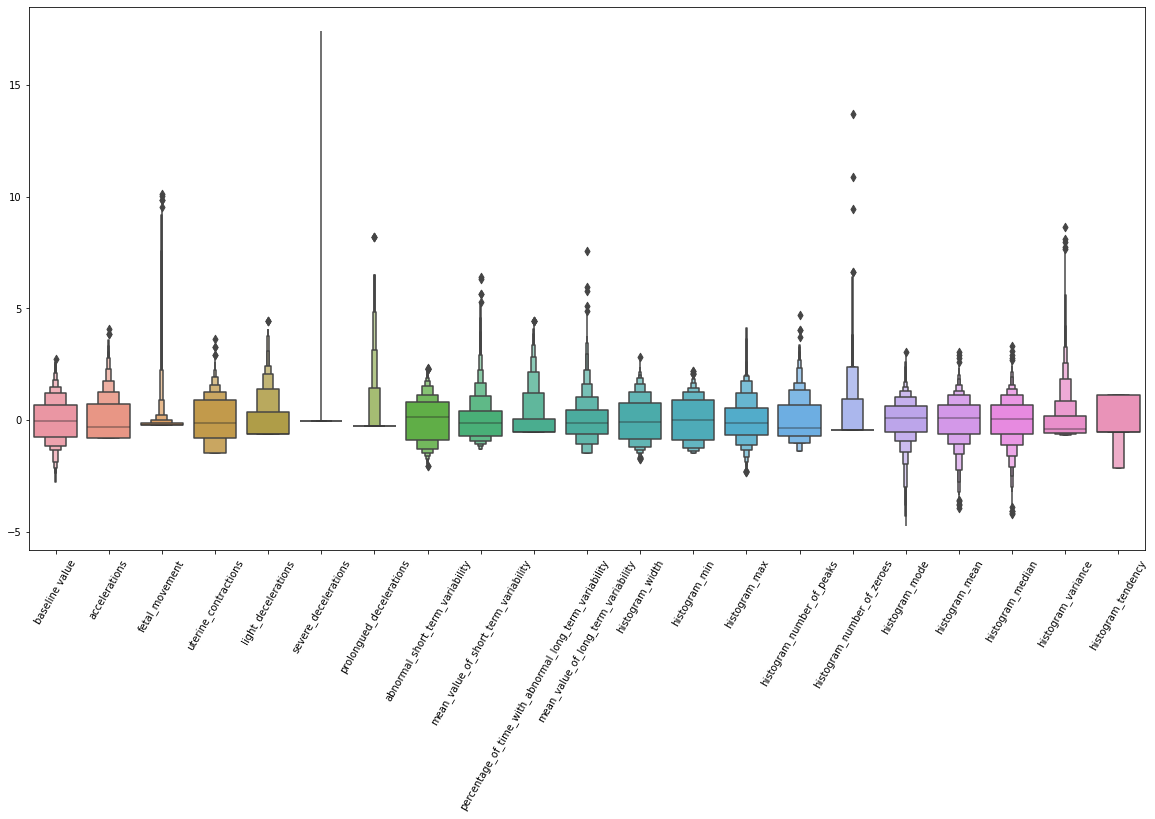

In [15]:
features=['baseline value', 'accelerations', 'fetal_movement','uterine_contractions', 'light_decelerations', 'severe_decelerations','prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability']

plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled)
plt.xticks(rotation=60)
plt.show()

## Data preprocessing :


Removing low-variance features
Removing duplicate rows
Balancing target variable
Feature selection

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold

In [17]:
round(np.var(data_df.iloc[:,:-1]),2)

baseline value                                              96.80
accelerations                                                0.00
fetal_movement                                               0.00
uterine_contractions                                         0.00
light_decelerations                                          0.00
severe_decelerations                                         0.00
prolongued_decelerations                                     0.00
abnormal_short_term_variability                            295.45
mean_value_of_short_term_variability                         0.78
percentage_of_time_with_abnormal_long_term_variability     338.29
mean_value_of_long_term_variability                         31.66
histogram_width                                           1516.83
histogram_min                                              873.40
histogram_max                                              321.84
histogram_number_of_peaks                                    8.69
histogram_

In [18]:
selector = VarianceThreshold(threshold=0.25)
selector.fit(data_df.iloc[:,:-1])
concol = [column for column in data_df.iloc[:,:-1].columns if column not in data_df.iloc[:,:-1].columns[selector.get_support()]]
for features in concol:
    print('Low variance features: ', features)

Low variance features:  accelerations
Low variance features:  fetal_movement
Low variance features:  uterine_contractions
Low variance features:  light_decelerations
Low variance features:  severe_decelerations
Low variance features:  prolongued_decelerations


In [19]:
data = data_df.drop(concol,axis=1)
data.shape

(2126, 16)

In [20]:
shape1 = data.shape[0]
data = data.drop_duplicates()
print('Removed', shape1 - data.shape[0], 'duplicate rows')

Removed 14 duplicate rows


In [21]:
data['fetal_health'].value_counts()

1.0    1646
2.0     292
3.0     174
Name: fetal_health, dtype: int64

SMOTE

Added 2826 rows regarding minority classes


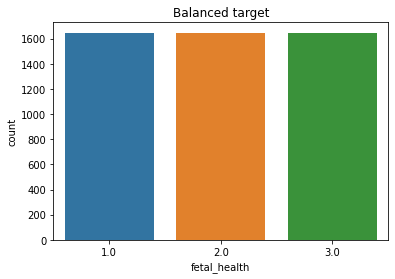

In [22]:
data1 = data.copy()
shape0 = data.shape[0]
smote = SMOTE(sampling_strategy = 'not majority', random_state=50)
sm_data = smote.fit_resample(data1.iloc[:,:-1], data1.iloc[:,-1])
                                                             
smoted_data = sm_data[0]
smoted_data['fetal_health'] = sm_data[1]
                                                             
print('Added', smoted_data.shape[0] - shape0, 'rows regarding minority classes')
sns.countplot(x=smoted_data['fetal_health']).set(title='Balanced target')
plt.show()

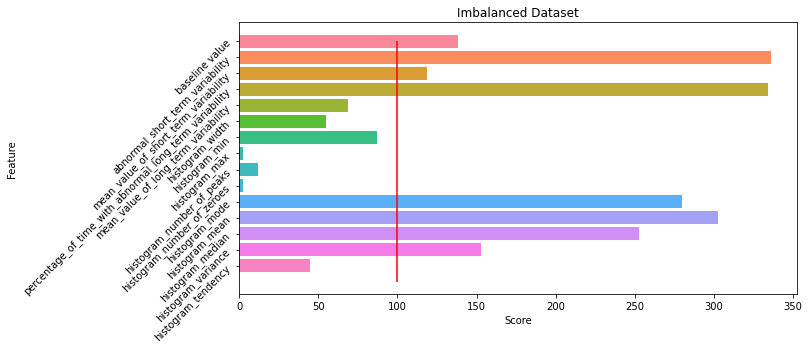

In [23]:
x = data.iloc[:,:-1] 
y = data.iloc[:,-1]

selector = SelectKBest(f_classif, k='all')
selector.fit(x,y)

dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 

fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(data=featureScores, x='Score', y='Feature',linewidth=0.5, saturation=2, orient='h').set(title = 'Imbalanced Dataset')
plt.vlines(x = 100, ymin = 0, ymax = 15, color = 'red')
plt.yticks(rotation=45)
plt.show()


In [24]:
selection = featureScores[featureScores['Score']>=100] 
selection = list(selection['Feature']) 
selection.append('fetal_health') 

new_data1 = data[selection]

print('Imbalanced dataset: ', new_data1.shape)

Imbalanced dataset:  (2112, 9)


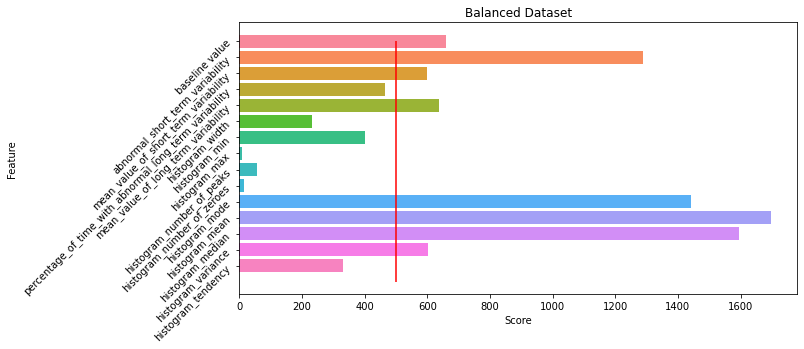

In [25]:
x = smoted_data.iloc[:,:-1] 
y = smoted_data.iloc[:,-1]

selector = SelectKBest(f_classif, k='all')
selector.fit(x,y)

dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 

fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(data=featureScores, x='Score', y='Feature',linewidth=0.5, saturation=2, orient='h').set(title = 'Balanced Dataset')
plt.vlines(x = 500, ymin = 0, ymax = 15, color = 'red')
plt.yticks(rotation=45)
plt.show()


In [26]:
selection = featureScores[featureScores['Score']>=500] 
selection = list(selection['Feature']) 
selection.append('fetal_health') 

new_data2 = smoted_data[selection]

print('Balanced dataset: ', new_data2.shape)

Balanced dataset:  (4938, 9)


The Stratified Shuffle Split will be used to maintain the ratio of classes into both datasets.

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=111)

train_idx, test_idx = next(sss.split(new_data1.iloc[:,:-1], new_data1.fetal_health))

X_train1 = new_data1.iloc[train_idx, :-1]
y_train1 = new_data1.iloc[train_idx, -1]

X_test1 = new_data1.iloc[test_idx, :-1]
y_test1 = new_data1.iloc[test_idx, -1]


print('Imbalanced Train set dimention: ', X_train1.shape)
print('Imbalanced Test set dimention: ', X_test1.shape)

Imbalanced Train set dimention:  (1478, 8)
Imbalanced Test set dimention:  (634, 8)


In [28]:
sc1=StandardScaler()
x_train1= sc1.fit_transform(X_train1) 
x_test1= sc1.transform(X_test1)

In [29]:
train_idx, test_idx = next(sss.split(new_data2.iloc[:,:-1], new_data2.fetal_health))

X_train2 = new_data2.iloc[train_idx, :-1]
y_train2 = new_data2.iloc[train_idx, -1]

X_test2 = new_data2.iloc[test_idx, :-1]
y_test2 = new_data2.iloc[test_idx, -1]


print('Imbalanced Train set dimention: ', X_train2.shape)
print('Imbalanced Test set dimention: ', X_test2.shape)

Imbalanced Train set dimention:  (3456, 8)
Imbalanced Test set dimention:  (1482, 8)


In [30]:
sc2=StandardScaler()
x_train2= sc2.fit_transform(X_train2) 
x_test2= sc2.transform(X_test2)

## MODEL BUILDING

KNN

In [31]:
knn1 = KNeighborsClassifier()
knn1.fit(x_train1, y_train1)
print('Accuracy score on imbalanced dataset is: ', (cross_val_score(knn1, x_train1, y_train1, cv=3)).mean()*100)
knn2 = KNeighborsClassifier()
knn2.fit(x_train2, y_train2)
print('Accuracy score on balanced dataset is: ', (cross_val_score(knn2, x_train2, y_train2, cv=3)).mean()*100)

Accuracy score on imbalanced dataset is:  89.37716101298943
Accuracy score on balanced dataset is:  91.66666666666666


In [32]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

opt_knn1 = GridSearchCV(KNeighborsClassifier(), 
                       parameters,
                       cv=3,
                       verbose=0,
                       scoring='accuracy')

knn1 = opt_knn1.fit(x_train1, y_train1)
print('Best parameters for imbalanced dataset: ', knn1.best_params_, 'with cross validation score: ', (knn1.best_score_)*100)
knn1_score = knn1.best_score_

opt_knn2 = GridSearchCV(KNeighborsClassifier(), 
                       parameters,
                       cv=3,
                       verbose=0,
                       scoring='accuracy')

knn2 = opt_knn2.fit(x_train2, y_train2)
print('Best parameters for balanced dataset: ', knn2.best_params_, 'with cross validation score: ', (knn2.best_score_)*100)
knn2_score = knn2.best_score_

Best parameters for imbalanced dataset:  {'n_neighbors': 3} with cross validation score:  90.86575196380767
Best parameters for balanced dataset:  {'n_neighbors': 1} with cross validation score:  93.89467592592592


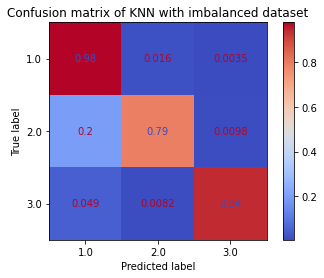

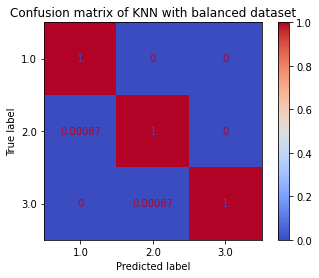

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
ConfusionMatrixDisplay.from_estimator(knn1, x_train1, y_train1, cmap='coolwarm', normalize='true')
plt.title('Confusion matrix of KNN with imbalanced dataset')
plt.show()

ConfusionMatrixDisplay.from_estimator(knn2, x_train2, y_train2, cmap='coolwarm', normalize='true')
plt.title('Confusion matrix of KNN with balanced dataset')
plt.show()


Decision Tree

In [34]:
dt1 = DecisionTreeClassifier(random_state=50)
dt1.fit(x_train1, y_train1)
print('Accuracy score on imbalanced dataset is: ', (cross_val_score(dt1, x_train1, y_train1, cv=3)).mean()*100)
dt2 = DecisionTreeClassifier(random_state=50)
dt2.fit(x_train2, y_train2)
print('Accuracy score on balanced dataset is: ', (cross_val_score(dt2, x_train2, y_train2, cv=3)).mean()*100)

Accuracy score on imbalanced dataset is:  91.3400067063551
Accuracy score on balanced dataset is:  90.65393518518518


In [35]:
parameters = {'max_depth': [2, 4, 8, 16, 36, 64, 128, 256]}

opt_dt1 = GridSearchCV(DecisionTreeClassifier(random_state=50), 
                       parameters,
                       cv=3,
                       verbose=0,
                       scoring='accuracy')

dt1 = opt_dt1.fit(x_train1, y_train1)
print('Best parameters for imbalanced dataset: ', dt1.best_params_, 'with cross validation score: ', (dt1.best_score_)*100)
dt1_score = dt1.best_score_

opt_dt2 = GridSearchCV(DecisionTreeClassifier(random_state=50), 
                       parameters,
                       cv=3,
                       verbose=0,
                       scoring='accuracy')

dt2 = opt_dt2.fit(x_train2, y_train2)
print('Best parameters for balanced dataset: ', dt2.best_params_, 'with cross validation score: ', (dt2.best_score_)*100)
dt2_score = dt2.best_score_


Best parameters for imbalanced dataset:  {'max_depth': 8} with cross validation score:  92.62438364748759
Best parameters for balanced dataset:  {'max_depth': 36} with cross validation score:  90.65393518518518


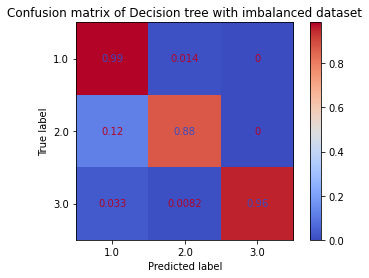

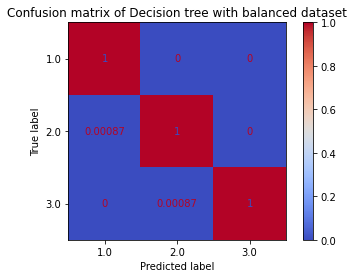

In [36]:
ConfusionMatrixDisplay.from_estimator(dt1, x_train1, y_train1, cmap='coolwarm', normalize='true')
plt.title('Confusion matrix of Decision tree with imbalanced dataset')
plt.show()

ConfusionMatrixDisplay.from_estimator(dt2, x_train2, y_train2, cmap='coolwarm', normalize='true')
plt.title('Confusion matrix of Decision tree with balanced dataset')
plt.show()

Random Forest

In [37]:
rf1 = RandomForestClassifier(random_state=50)
rf1.fit(x_train1, y_train1)
print('Accuracy score on imbalanced dataset is: ', (cross_val_score(rf1, x_train1, y_train1, cv=3)).mean()*100)
rf2 = RandomForestClassifier(random_state=50)
rf2.fit(x_train2, y_train2)
print('Accuracy score on balanced dataset is: ', (cross_val_score(rf2, x_train2, y_train2, cv=3)).mean()*100)

Accuracy score on imbalanced dataset is:  92.96327446033081
Accuracy score on balanced dataset is:  93.75


In [38]:
parameters = {'n_estimators': [64, 128, 256, 512],
              'max_depth' : [2, 4, 8, 16, 36, 64, 128, 256, 512]}

opt_rf1 = GridSearchCV(RandomForestClassifier(random_state=50), 
                       parameters,
                       cv=3,
                       verbose=0,
                       scoring='accuracy')

rf1 = opt_rf1.fit(x_train1, y_train1)
print('Best parameters for imbalanced dataset: ', rf1.best_params_, 'with cross validation score: ', (rf1.best_score_)*100)
rf1_score = rf1.best_score_

opt_rf2 = GridSearchCV(RandomForestClassifier(random_state=50), 
                       parameters,
                       cv=3,
                       verbose=0,
                       scoring='accuracy')

rf2 = opt_rf2.fit(x_train2, y_train2)
print('Best parameters for balanced dataset: ', rf2.best_params_, 'with cross validation score: ', (rf2.best_score_)*100)
rf2_score = rf2.best_score_

Best parameters for imbalanced dataset:  {'max_depth': 16, 'n_estimators': 64} with cross validation score:  93.23372746912054
Best parameters for balanced dataset:  {'max_depth': 16, 'n_estimators': 512} with cross validation score:  94.01041666666666


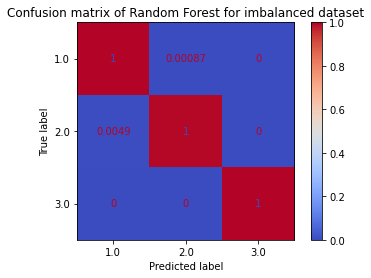

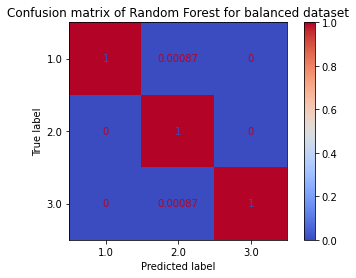

In [39]:
ConfusionMatrixDisplay.from_estimator(rf1, x_train1, y_train1, cmap='coolwarm', normalize='true')
plt.title('Confusion matrix of Random Forest for imbalanced dataset')
plt.show()

ConfusionMatrixDisplay.from_estimator(rf2, x_train2, y_train2, cmap='coolwarm', normalize='true')
plt.title('Confusion matrix of Random Forest for balanced dataset')
plt.show()

Gradient Boost

In [40]:
gbc1 = GradientBoostingClassifier(random_state=50)
gbc1.fit(x_train1, y_train1)
print('Accuracy score on imbalanced dataset is: ', (cross_val_score(gbc1, x_train1, y_train1, cv=3)).mean()*100)
gbc2 = GradientBoostingClassifier(random_state=50)
gbc2.fit(x_train2, y_train2)
print('Accuracy score on balanced dataset is: ', (cross_val_score(gbc2, x_train2, y_train2, cv=5)).mean()*100)

Accuracy score on imbalanced dataset is:  93.16666391816048
Accuracy score on balanced dataset is:  92.9109190835097


In [41]:
parameters = {'n_estimators': [64, 128, 256],
              'learning_rate' : [0.1, 0.001, 0.2, 0.002]}

opt_gb1 = GridSearchCV(GradientBoostingClassifier(random_state=50), 
                       parameters,
                       cv=3,
                       verbose=0,
                       scoring='accuracy')

gb1 = opt_gb1.fit(x_train1, y_train1)
print('Best parameters for imbalanced dataset: ', gb1.best_params_, 'with cross validation score: ', (gb1.best_score_)*100)
gb1_score = gb1.best_score_

opt_gb2 = GridSearchCV(GradientBoostingClassifier(random_state=50), 
                       parameters,
                       cv=3,
                       verbose=0,
                       scoring='accuracy')

gb2 = opt_gb2.fit(x_train2, y_train2)
print('Best parameters for balanced dataset: ', gb2.best_params_, 'with cross validation score: ', (gb2.best_score_)*100)
gb2_score = gb2.best_score_

Best parameters for imbalanced dataset:  {'learning_rate': 0.1, 'n_estimators': 64} with cross validation score:  93.30189042255533
Best parameters for balanced dataset:  {'learning_rate': 0.2, 'n_estimators': 256} with cross validation score:  94.2997685185185


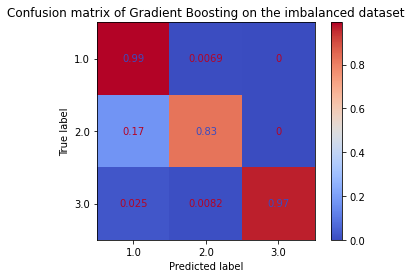

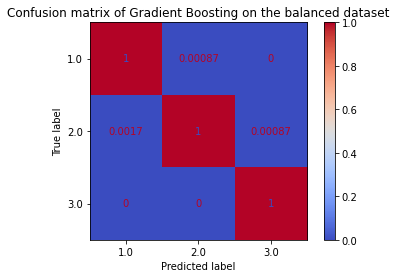

In [43]:
ConfusionMatrixDisplay.from_estimator(gb1, x_train1, y_train1, cmap='coolwarm', normalize='true')
plt.title('Confusion matrix of Gradient Boosting on the imbalanced dataset')
plt.show()

ConfusionMatrixDisplay.from_estimator(gb2, x_train2, y_train2, cmap='coolwarm', normalize='true')
plt.title('Confusion matrix of Gradient Boosting on the balanced dataset')
plt.show()

Naive Bayes

In [42]:
gnb1 = GaussianNB()
gnb1.fit(x_train1, y_train1)
print('Accuracy score on imbalanced dataset is: ', (cross_val_score(gnb1, x_train1, y_train1, cv=3)).mean()*100)
gnb2 =GaussianNB()
gnb2.fit(x_train2, y_train2)
print('Accuracy score on balanced dataset is: ', (cross_val_score(gnb2, x_train2, y_train2, cv=5)).mean()*100)

Accuracy score on imbalanced dataset is:  80.31190048208798
Accuracy score on balanced dataset is:  72.51135574646781


Evaluation

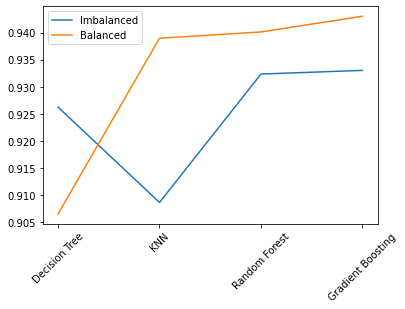

In [44]:
accuracy1 = [ dt1_score, knn1_score, rf1_score, gb1_score]
accuracy2 = [dt2_score, knn2_score, rf2_score, gb2_score]
models = ['Decision Tree', 'KNN', 'Random Forest', 'Gradient Boosting']
fig, ax = plt.subplots()
ax.plot(models, accuracy1, label = 'Imbalanced')
ax.plot(models, accuracy2, label = 'Balanced')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [45]:
predictions = knn2.predict(x_test2)
print('Table of metrics:\n ', classification_report(y_test2, predictions, target_names=['Normal', 'Suspect', 'Pathological']))

Table of metrics:
                precision    recall  f1-score   support

      Normal       0.97      0.94      0.96       494
     Suspect       0.92      0.96      0.94       494
Pathological       0.98      0.97      0.98       494

    accuracy                           0.96      1482
   macro avg       0.96      0.96      0.96      1482
weighted avg       0.96      0.96      0.96      1482



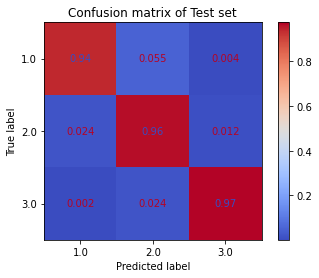

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test2, predictions, cmap='coolwarm', normalize='true')
plt.title('Confusion matrix of Test set')
plt.show()

In [47]:
X = data_df.iloc[:,:-1]
y = data_df.iloc[:,-1]
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(X), columns = X.columns)
df.head()

baseline value  abnormal_short_term_variability  \
0       -1.352582                         1.516071   
1       -0.131920                        -1.746638   
2       -0.030199                        -1.804901   
3        0.071523                        -1.804901   
4       -0.131920                        -1.804901   

   mean_value_of_short_term_variability  \
0                             -0.945178   
1                              0.864730   
2                              0.864730   
3                              1.204088   
4                              1.204088   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                           1.819796        
1                                          -0.534329        
2                                          -0.534329        
3                                          -0.534329        
4                                          -0.534329        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                            -1.024411        -0.168446      -1.067703   
1                             0.396119         1.524660      -0.864585   
2                             0.928818         1.524660      -0.864585   
3                             2.633454         1.191169      -1.372381   
4                             2.082998         1.191169      -1.372381   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0      -2.123673                  -0.704394                   -0.460282   
1       1.888979                   0.651123                    0.952676   
2       1.888979                   0.312244                    0.952676   
3       0.328503                   2.345519                   -0.460282   
4       0.328503                   1.667760                   -0.460282   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0       -1.063942        0.154236         -1.180095            1.862656   
1        0.216565        0.090163          0.132401           -0.238195   
2        0.216565        0.026090         -0.005757           -0.203755   
3       -0.027341       -0.037982         -0.074835           -0.203755   
4       -0.027341        0.090163         -0.005757           -0.272635   

   histogram_tendency  
0            1.115066  
1           -0.521501  
2           -0.521501  
3            1.115066  
4            1.115066

In [49]:
splitter = StratifiedShuffleSplit(n_splits=3)
for train_ids, test_ids in splitter.split(X, y):
    X_train_full, y_train_full = X.iloc[train_ids], y.iloc[train_ids]
    X_test, y_test = X.iloc[test_ids], y.iloc[test_ids]

In [50]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2)

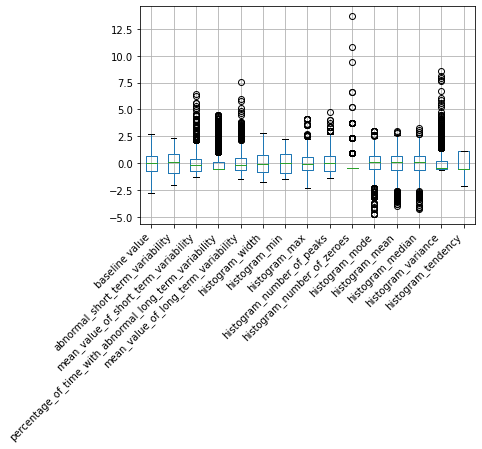

In [51]:
df.boxplot()
plt.xticks(rotation=45, ha='right')
plt.show()

Neural Net

In [60]:
from keras import Sequential
from keras.layers import Dense, Dropout

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint
name = "dense"
# Model Architecture
model = Sequential([
    Dense(32, activation='relu', kernel_initializer='he_normal'),
    Dense(64, activation='relu', kernel_initializer='he_normal'),
    Dense(128, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(4, activation='softmax'),
], name=name)

# Compile
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks
cbs = [EarlyStopping(patience=3, restore_best_weights=True), ModelCheckpoint(name + ".h5", save_best_only=True)]
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=35, callbacks=cbs)

Epoch 1/35
48/48 [==============================] - 1s 7ms/step - loss: 37.6225 - accuracy: 0.5980 - val_loss: 6.3513 - val_accuracy: 0.7868
Epoch 2/35
48/48 [==============================] - 0s 3ms/step - loss: 7.4924 - accuracy: 0.7421 - val_loss: 2.8381 - val_accuracy: 0.8079
Epoch 3/35
48/48 [==============================] - 0s 4ms/step - loss: 5.5986 - accuracy: 0.7428 - val_loss: 2.2963 - val_accuracy: 0.8421
Epoch 4/35
48/48 [==============================] - 0s 4ms/step - loss: 4.3500 - accuracy: 0.7750 - val_loss: 2.1626 - val_accuracy: 0.8447
Epoch 5/35
48/48 [==============================] - 0s 4ms/step - loss: 3.0603 - accuracy: 0.7875 - val_loss: 1.5474 - val_accuracy: 0.8447
Epoch 6/35
48/48 [==============================] - 0s 4ms/step - loss: 2.4744 - accuracy: 0.7928 - val_loss: 1.3440 - val_accuracy: 0.8526
Epoch 7/35
48/48 [==============================] - 0s 4ms/step - loss: 2.0280 - accuracy: 0.7934 - val_loss: 1.3132 - val_accuracy: 0.8395
Epoch 8/35
48/48 [=

In [62]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9104


[0.20995181798934937, 0.9103773832321167]

In [66]:
pred = np.argmax(model.predict(X_test), axis=1)

# Calculate Score
acc_score = accuracy_score(y_test, pred)
pre_score = precision_score(y_test, pred, average='macro')
re_score = recall_score(y_test, pred, average='macro')
f_score = f1_score(y_test, pred, average='macro')

# Show Prediction
print("Accuracy Score  : {:.6}".format(acc_score))
print("Precision Score : {:.6}".format(pre_score))
print("Recall Score    : {:.6}".format(re_score))
print("f1 Score        : {:.6}".format(f_score))

7/7 [==============================] - 0s 2ms/step
Accuracy Score  : 0.910377
Precision Score : 0.872629
Recall Score    : 0.845803
f1 Score        : 0.855699


In [64]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       165
         2.0       0.67      0.76      0.71        29
         3.0       1.00      0.83      0.91        18

    accuracy                           0.91       212
   macro avg       0.87      0.85      0.86       212
weighted avg       0.92      0.91      0.91       212



## Unsupervised

Principal Component Analysis

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
result = pca.fit_transform(df)
print("Kaiser's rule: ", pca.explained_variance_)
print("Cumulative sum of variance explained: ", np.cumsum(pca.explained_variance_ratio_))

Kaiser's rule:  [5.26728322 3.2595838  1.53937048 1.18115134]
Cumulative sum of variance explained:  [0.35098595 0.56818864 0.67076475 0.74947089]


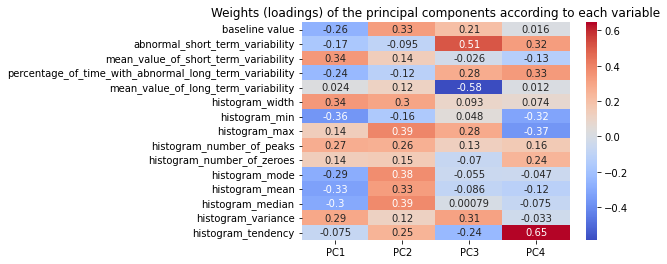

In [68]:
loadings = pd.DataFrame(np.transpose(pca.components_))
loadings.columns = ['PC1', 'PC2', 'PC3', 'PC4']
loadings.index = df.columns
ax = sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('Weights (loadings) of the principal components according to each variable')
plt.show()

In [70]:
scores = pd.DataFrame(result)
scores.columns = ['PC1', 'PC2', 'PC3', 'PC4']
scores['target'] = y.reset_index().iloc[:,-1]
scores.head()

PC1       PC2       PC3       PC4  target
0  0.169757 -2.321112  1.263471  2.853563     2.0
1  2.001870  2.009072 -0.646743 -1.183584     1.0
2  1.977828  1.950506 -0.994339 -1.231758     1.0
3  2.314957  2.181897 -2.481595  0.516509     1.0
4  2.087153  1.933677 -2.321376  0.380564     1.0

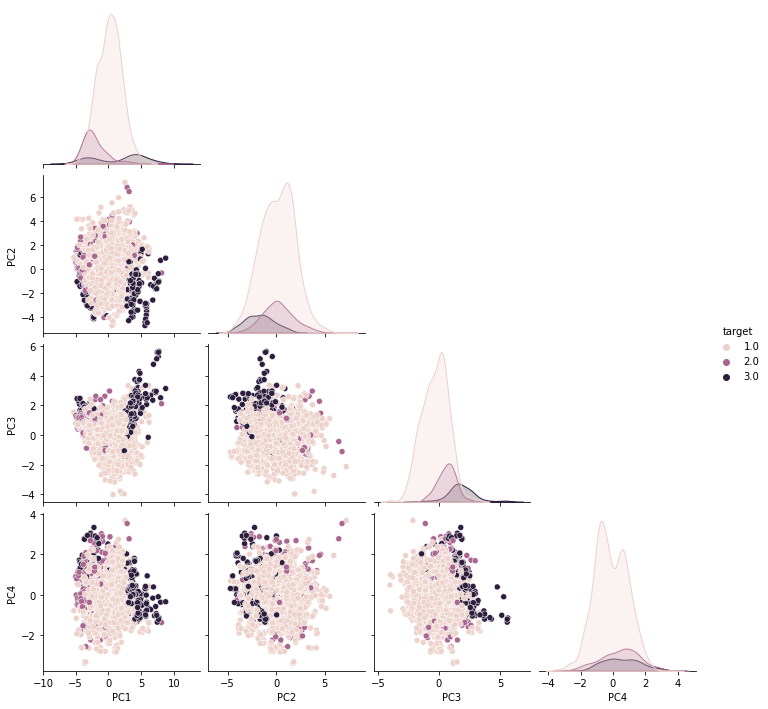

In [71]:
sns.pairplot(scores, hue='target', diag_kind='kde', corner=True)

KMeans Clustering

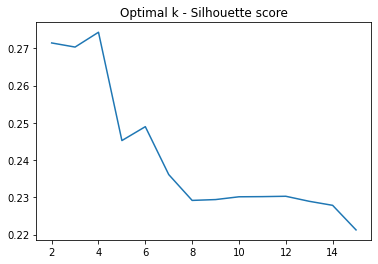

In [83]:

X = scores.iloc[:,:-1]
y = scores.iloc[:,-1]

k_test = range(2, 16, 1)
silhouette_scores = []

for k in k_test:
    kmeans_k = KMeans(n_clusters=k, n_init = 200, random_state=100)
    kmeans_k.fit(X)
    label_k = kmeans_k.labels_
    score_k = silhouette_score(X, label_k)
    silhouette_scores.append(score_k)
        
sns.lineplot(x=k_test, y=silhouette_scores).set(title='Optimal k - Silhouette score')
plt.show() 

In [84]:
from time import time
t0 = time()
kmeans = KMeans(n_clusters = 4, n_init = 200, random_state=100)
kmeans.fit(X)
time_kmeans = time() - t0
print('External measure is: ', adjusted_rand_score(y, kmeans.labels_))


External measure is:  0.06623342816473071


In [85]:
kmeans_measures = []
s_kmeans = silhouette_score(X, kmeans.labels_)
adj_rand_kmeans = adjusted_rand_score(y, kmeans.labels_)
kmeans_measures.append(s_kmeans)
kmeans_measures.append(adj_rand_kmeans)
kmeans_measures.append(time_kmeans)

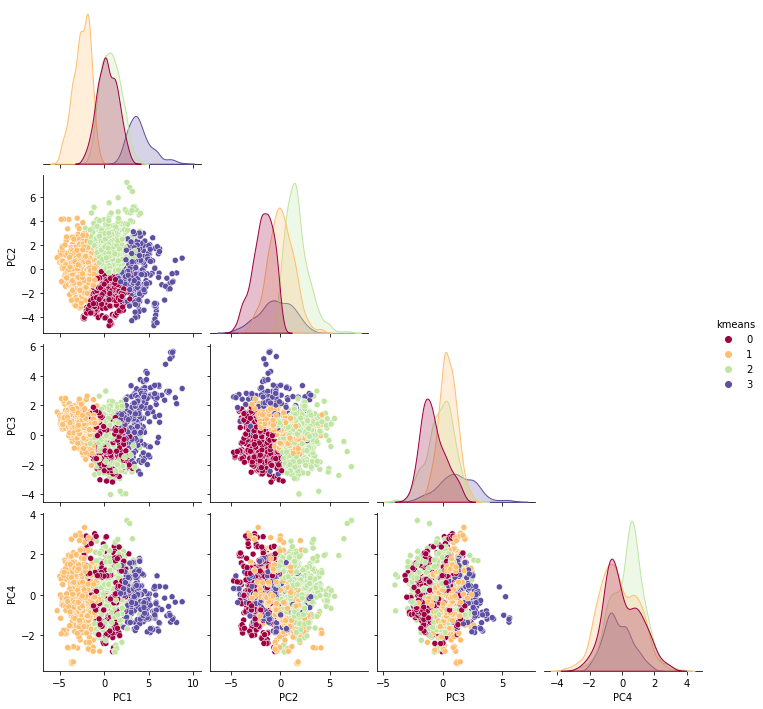

In [86]:
X['kmeans'] = kmeans.labels_.astype('int')
sns.pairplot(X, hue='kmeans', corner=True, palette = 'Spectral')
plt.show()
X = X.drop(columns =['kmeans'])

 Agglomerative Clustering

In [88]:
agglomerative = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward').fit(X)
print('Internal measure with Euclidean-Ward: ', silhouette_score(X, agglomerative.labels_))
agglomerative = AgglomerativeClustering(affinity = 'euclidean', linkage = 'complete').fit(X)
print('Internal measure with Euclidean-Complete: ', silhouette_score(X, agglomerative.labels_))
agglomerative = AgglomerativeClustering(affinity = 'euclidean', linkage = 'average').fit(X)
print('Internal measure with Euclidean-Average: ', silhouette_score(X, agglomerative.labels_))
agglomerative = AgglomerativeClustering(affinity = 'euclidean', linkage = 'single').fit(X)
print('Internal measure with Euclidean-Single: ', silhouette_score(X, agglomerative.labels_))

agglomerative = AgglomerativeClustering(affinity = 'manhattan', linkage = 'complete').fit(X)
print('Internal measure with Manhattan-Complete: ', silhouette_score(X, agglomerative.labels_))
agglomerative = AgglomerativeClustering(affinity = 'manhattan', linkage = 'average').fit(X)
print('Internal measure with Manhattan-Average: ', silhouette_score(X, agglomerative.labels_))
agglomerative = AgglomerativeClustering(affinity = 'manhattan', linkage = 'single').fit(X)
print('Internal measure with Manhattan-Single: ', silhouette_score(X, agglomerative.labels_))

agglomerative = AgglomerativeClustering(affinity = 'cosine', linkage = 'complete').fit(X)
print('Internal measure with Cosine-Complete: ', silhouette_score(X, agglomerative.labels_))
agglomerative = AgglomerativeClustering(affinity = 'cosine', linkage = 'average').fit(X)
print('Internal measure with Cosine-Average: ', silhouette_score(X, agglomerative.labels_))
agglomerative = AgglomerativeClustering(affinity = 'cosine', linkage = 'single').fit(X)
print('Internal measure with Cosine-Single: ', silhouette_score(X, agglomerative.labels_))

agglomerative = AgglomerativeClustering(affinity = 'l1', linkage = 'complete').fit(X)
print('Internal measure with L1-Complete: ', silhouette_score(X, agglomerative.labels_))
agglomerative = AgglomerativeClustering(affinity = 'l1', linkage = 'average').fit(X)
print('Internal measure with L1-Average: ', silhouette_score(X, agglomerative.labels_))
agglomerative = AgglomerativeClustering(affinity = 'l1', linkage = 'single').fit(X)
print('Internal measure with L1-Single: ', silhouette_score(X, agglomerative.labels_))

agglomerative = AgglomerativeClustering(affinity = 'l2', linkage = 'complete').fit(X)
print('Internal measure with L2-Complete: ', silhouette_score(X, agglomerative.labels_))
agglomerative = AgglomerativeClustering(affinity = 'l2', linkage = 'average').fit(X)
print('Internal measure with L2-Average: ', silhouette_score(X, agglomerative.labels_))
agglomerative = AgglomerativeClustering(affinity = 'l2', linkage = 'single').fit(X)
print('Internal measure with L2-Single: ', silhouette_score(X, agglomerative.labels_))

Internal measure with Euclidean-Ward:  0.23333450749169637
Internal measure with Euclidean-Complete:  0.18737920838514732
Internal measure with Euclidean-Average:  0.4529262790082102
Internal measure with Euclidean-Single:  0.4651480814270597
Internal measure with Manhattan-Complete:  0.28823777934817596
Internal measure with Manhattan-Average:  0.39683983355216207
Internal measure with Manhattan-Single:  0.48250396377899873
Internal measure with Cosine-Complete:  0.21102092718888366
Internal measure with Cosine-Average:  0.25163313241695934
Internal measure with Cosine-Single:  -0.22062952330264363
Internal measure with L1-Complete:  0.28823777934817596
Internal measure with L1-Average:  0.39683983355216207
Internal measure with L1-Single:  0.48250396377899873
Internal measure with L2-Complete:  0.18737920838514732
Internal measure with L2-Average:  0.4529262790082102
Internal measure with L2-Single:  0.4651480814270597


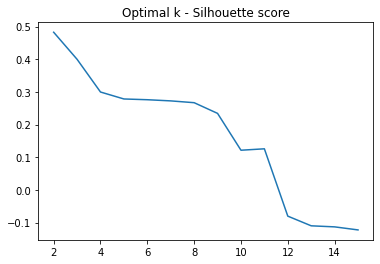

In [89]:
k_test = range(2, 16, 1)
silhouette_scores = []

for k in k_test:
    aggl_k = AgglomerativeClustering(n_clusters=k, affinity = 'manhattan', linkage = 'single')
    aggl_k.fit(X)
    label_k = aggl_k.labels_
    score_k = silhouette_score(X, label_k)
    silhouette_scores.append(score_k)
        
sns.lineplot(x=k_test, y=silhouette_scores).set(title='Optimal k - Silhouette score')
plt.show()   

In [90]:
t0 = time()
agglomerative = AgglomerativeClustering(n_clusters=2, affinity = 'manhattan', linkage = 'single').fit(X)
aggl_time = time() - t0
print('External measure is: ', adjusted_rand_score(y, agglomerative.labels_))

External measure is:  0.004345866343000768


In [91]:
aggl_measures = []
s_aggl = silhouette_score(X, agglomerative.labels_)
adj_rand_aggl = adjusted_rand_score(y, agglomerative.labels_)
aggl_measures.append(s_aggl)
aggl_measures.append(adj_rand_aggl)
aggl_measures.append(aggl_time)

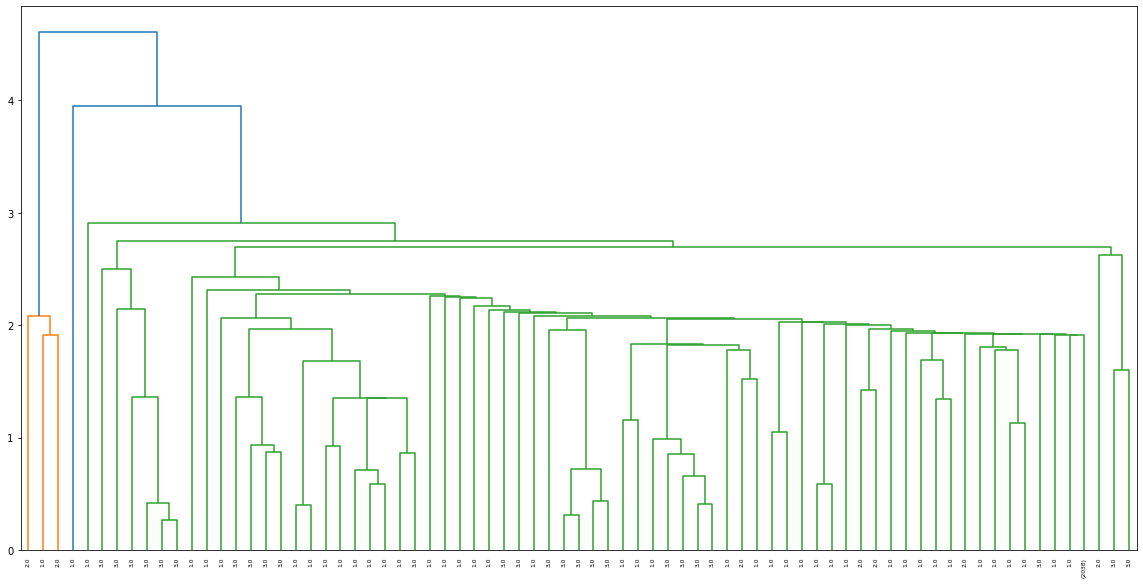

In [92]:
ytdist = np.array(X)
Z = hierarchy.linkage(ytdist, method = 'single', metric = 'cityblock')
plt.figure(figsize = (20,10))
dn = hierarchy.dendrogram(Z, truncate_mode = 'level', labels = np.array(y))

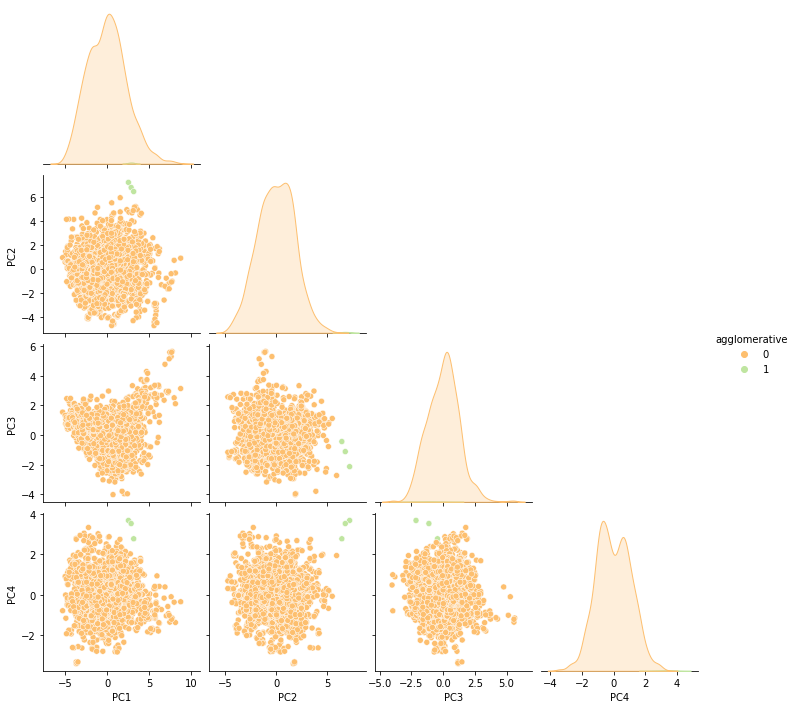

In [93]:
X['agglomerative'] = agglomerative.labels_.astype(int)
sns.pairplot(X, hue='agglomerative', corner=True, palette='Spectral')
plt.show()
X = X.drop(columns =['agglomerative'])


Spectral  Clustering

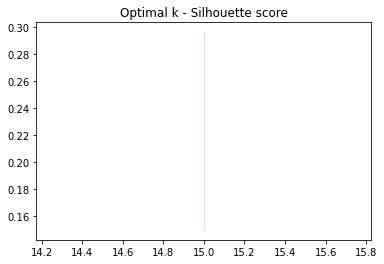

In [95]:
k_test = range(2, 16, 1)
silhouette_scores = []

for x in k_test:
    sp_k = SpectralClustering(n_clusters = x, random_state = 100)
    sp_k.fit(X)
    label_k = sp_k.labels_
    score_k = silhouette_score(X, label_k)
    silhouette_scores.append(score_k)
        
sns.lineplot(x = k, y = silhouette_scores).set(title='Optimal k - Silhouette score')
plt.show()

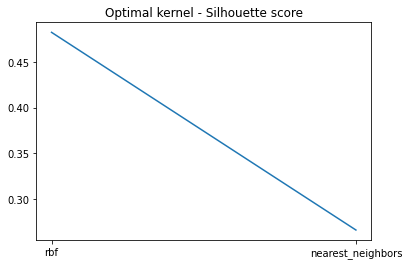

In [98]:
kernel = ['rbf', 'nearest_neighbors']
silhouette_scores = []

for k in kernel:
    sp_k = SpectralClustering(n_clusters = 2, affinity = k, random_state = 100)
    sp_k.fit(X)
    label_k = sp_k.labels_
    score_k = silhouette_score(X, label_k)
    silhouette_scores.append(score_k)
        
sns.lineplot(x = kernel, y = silhouette_scores).set(title='Optimal kernel - Silhouette score')
plt.show()  

In [99]:
t0 = time()
sp = SpectralClustering(n_clusters = 2, gamma = 0.1, random_state = 100).fit(X)
sp_time = time() - t0
print('External measure is: ', adjusted_rand_score(y, sp.labels_))

External measure is:  0.17491755590158306


In [100]:
sp_measures = []
s_sp = silhouette_score(X, sp.labels_)
adj_rand_sp = adjusted_rand_score(y, sp.labels_)
sp_measures.append(s_sp)
sp_measures.append(adj_rand_sp)
sp_measures.append(sp_time)

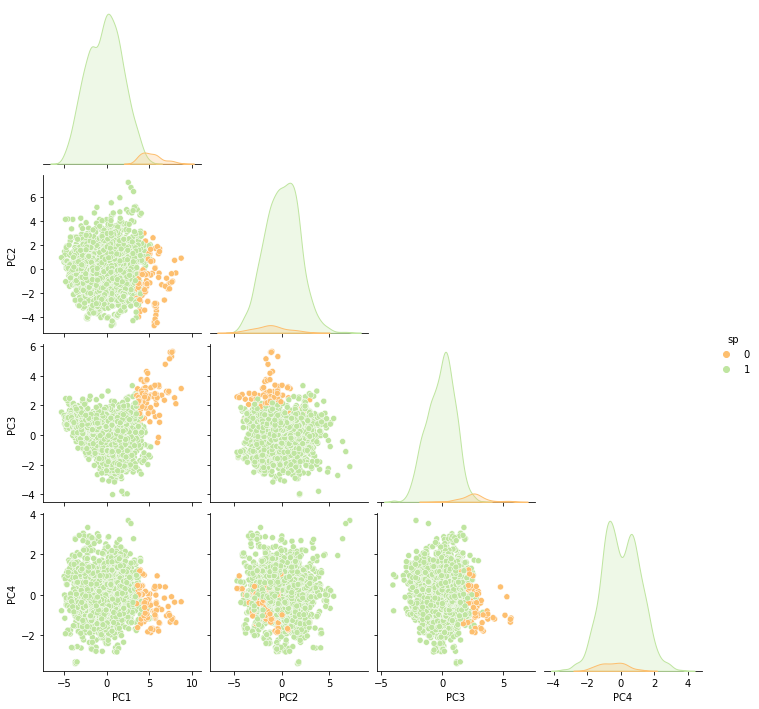

In [101]:
X['sp'] = sp.labels_.astype(int)
sns.pairplot(X, hue='sp', corner=True, palette='Spectral')
plt.show()
X = X.drop(columns =['sp'])

Evaluating unsupervised models

In [103]:
measures = pd.DataFrame(list(zip(kmeans_measures, aggl_measures, sp_measures)),
                        columns =['K-Means', 'Agglomerative', 'Spectral Clustering'],
                       index =['Silhouette Score', 'Adjusted Rand Score', 'Time'])
measures

K-Means  Agglomerative  Spectral Clustering
Silhouette Score     0.274332       0.482504             0.401270
Adjusted Rand Score  0.066233       0.004346             0.174918
Time                 1.539539       0.051909             2.084245

In [104]:
X['clusters'] = sp.labels_.astype('int')
X['ground_truth'] = y
confusion_matrix = pd.crosstab(X.iloc[:,-1], X.iloc[:,-2], rownames=['True'], colnames=['Clusters'])
print(confusion_matrix)

Clusters   0     1
True              
1.0       18  1628
2.0        2   290
3.0       68   106
